In [1]:
from ipy import *
import PAD 
%matplotlib inline

In [2]:
#####  Oct 26, 2015 - 04:00 - 06:00
afg_file       = 'C:/Yuggoth/Events/2015/Oct 26/mms1_afg_srvy_l2pre_20151026_v3.14.0.cdf'
debug_file     = 'C:/Yuggoth/Events/2015/Oct 26/mms1_fpi_fast_l2_des-debug_20151026040000_v3.1.0.cdf'
dist_file      = 'C:/Yuggoth/Events/2015/Oct 26/mms1_fpi_fast_l2_des-dist_20151026040000_v2.1.0.cdf'
moms_file      = 'C:/Yuggoth/Events/2015/Oct 26/mms1_fpi_fast_l2_des-moms_20151026040000_v3.0.0.cdf'

####Photoelectron correction file
photo_file     = 'C:/Yuggoth/Events/2015/mms_fpi_fast_l2_des-bgdist_v1.0.0_p0-2.cdf'

obs            = 'mms1'
ver            = 'ver2'

CDFs           = {}
CDFs['AFG']    = pycdf.CDF(afg_file)
CDFs['bfield'] = pycdf.CDF(debug_file)
CDFs['dist']   = pycdf.CDF(dist_file)
CDFs['moms']   = pycdf.CDF(moms_file)
CDFs['photo']  = pycdf.CDF(photo_file)
date           = 'Oct 26 0400-0600'

time_format    = '%H:%M:%S'

#corrections
corrections_on = 1

In [3]:
corrections_on = 1
dude = PAD.load_e_data(CDFs,obs,'des',ver,corrections_on,correction_override = 0.75,source='AFG')

['bfield', 'moms', 'AFG', 'dist', 'photo'] 0.75


PAD.py:212: RuntimeWarning: invalid value encountered in divide
  counts                   = (FS_dist['Dist']/FS_dist['Err'])**2


# QA Section

A quick QA to ensure that the epochs in the debug file are in sync with those in the distribution file

In [4]:
N = 0
print 'Starting epochs for debug and dist:'
print 'Debug file:         ', CDFs['bfield']['Epoch'][N]
print 'Distribution file:  ', CDFs['dist']['Epoch'][N]
print '\n'
N = int(len(CDFs['bfield']['Epoch'])/2)
print 'Epochs for debug and dist at halfway (N=%d):' % N
print 'Debug file:         ', CDFs['bfield']['Epoch'][N]
print 'Distribution file:  ', CDFs['dist']['Epoch'][N]
print '\n'
N = -1
print 'Ending Epochs for debug and dist'
print 'Debug file:         ', CDFs['bfield']['Epoch'][N]
print 'Distribution file:  ', CDFs['dist']['Epoch'][N]
print '\n'

Starting epochs for debug and dist:
Debug file:          2015-10-26 04:00:03.891987
Distribution file:   2015-10-26 04:00:03.891987


Epochs for debug and dist at halfway (N=800):
Debug file:          2015-10-26 05:00:03.914310
Distribution file:   2015-10-26 05:00:03.914310


Ending Epochs for debug and dist
Debug file:          2015-10-26 05:59:59.438597
Distribution file:   2015-10-26 05:59:59.438597




Look at the magnetic field and find the start_time_label

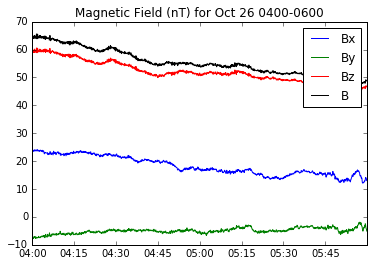

In [5]:
start_time_label = 0
time_slice       = slice(start_time_label,-1)
plt.plot(dude['bfield'][time_slice,0]*dude['bfield'][time_slice,3],label='Bx')
plt.plot(dude['bfield'][time_slice,1]*dude['bfield'][time_slice,3],label='By')
plt.plot(dude['bfield'][time_slice,2]*dude['bfield'][time_slice,3],label='Bz')
plt.plot(dude['bfield'][time_slice,3],'k-',label='B')
plt.legend()
n_B = len(dude['bfield'][:,0])
plt.title('Magnetic Field (nT) for %s' % date)
x        = np.arange(start_time_label,n_B,200)
x_labels  = []
for px in x:
    x_labels.append(dt.datetime.strftime(dude['edist']['Epoch'][px],'%H:%M'))
plt.xticks(x-start_time_label,x_labels,rotation=0)
plt.savefig('')
plt.show()

In [7]:
dude['edist']['Epoch'][-1]

datetime.datetime(2015, 10, 26, 5, 59, 59, 438597)

Ensure that photoelectrons have been corrected (energy 1 and greater)

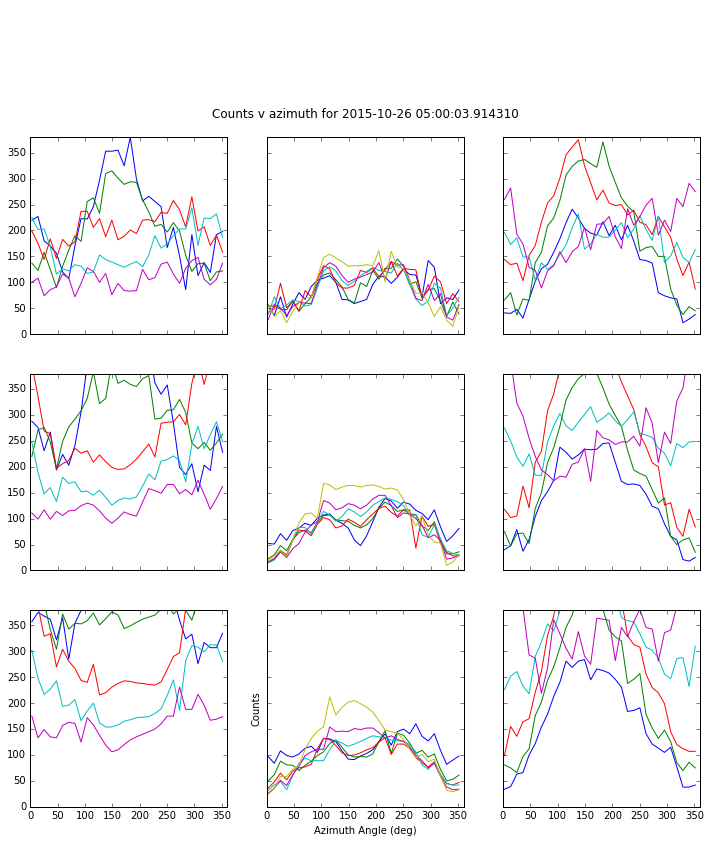

In [8]:
time_label = int(len(CDFs['bfield']['Epoch'])/2)
num_rows   = 3
fig7,axes  = plt.subplots(nrows=num_rows,ncols=3,figsize=(12,12),sharex=True,sharey=True)
for row in range(num_rows):
    for col in range(3):
        if col == 0:
            pix_range = slice(0,5)
        if col== 1:
            pix_range = slice(5,11)
            axes[row][col].annotate('Energy = %.2f ev'  % dude['parms']['Erg'][row],xy=(160,900),fontsize=10)
        if col == 2:
            pix_range = slice(11,16)
        axes[row][col].plot(dude['parms']['Phi'],dude['counts'][time_label,:,pix_range,row])
        axes[row][col].set_ylim([0,np.max(dude['counts'][time_label,:,:,0])])
        axes[row][col].set_xlim([0,360])

axes[0][1].set_title('Counts v azimuth for %s\n' % dude['edist']['Epoch'][time_label])        
axes[row][col-1].set_xlabel('Azimuth Angle (deg)')
axes[row][1].set_ylabel('Counts')
plt.show()

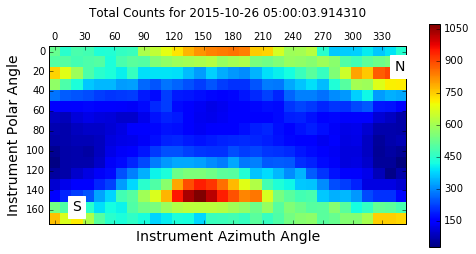

In [9]:
erg        = 1
Bx         = dude['bfield'][time_label,0]
By         = dude['bfield'][time_label,1]
Bz         = dude['bfield'][time_label,2]
BTheta     = np.arccos(Bz)*180/np.pi
BThetap    = 180.0 - BTheta
BPhi       = np.arctan2(By,Bx)*180/np.pi

if BPhi < 0:
    BPhi   = BPhi + 360

BPhip      = 360.0 - BPhi

BTheta     = BTheta/11.25
BPhi       = BPhi/11.25
BThetap    = BThetap/11.25
BPhip      = BPhip/11.25

plt.matshow(np.transpose(dude['counts'][0,:,:,erg]))#,cmap='hot')
plt.xlabel('Instrument Azimuth Angle',fontsize=14)
plt.ylabel('Instrument Polar Angle',fontsize=14)
plt.colorbar()
plt.title('Total Counts for %s\n' % dude['edist']['Epoch'][time_label])
x = np.arange(0,360,30)
y = np.arange(0,180,20)
plt.xticks(x/11.25,x)
plt.yticks(y/11.25,y)
plt.annotate('N',xy=(BPhi,BTheta),  fontsize=14,color='k',backgroundcolor='w')
plt.annotate('S',xy=(BPhip,BThetap),fontsize=14,color='k',backgroundcolor='w')

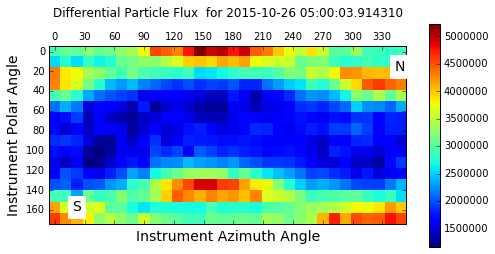

In [10]:
erg        = 0
Bx         = dude['bfield'][time_label,0]
By         = dude['bfield'][time_label,1]
Bz         = dude['bfield'][time_label,2]
BTheta     = np.arccos(Bz)*180/np.pi
BThetap    = 180.0 - BTheta
BPhi       = np.arctan2(By,Bx)*180/np.pi
if BPhi < 0:
    BPhi   = BPhi + 360
BPhip      = 360.0 - BPhi

BTheta     = BTheta/11.25
BPhi       = BPhi/11.25
BThetap    = BThetap/11.25
BPhip      = BPhip/11.25

plt.matshow(np.transpose(dude['jN'][0,:,:,erg]))#,cmap='hot')
plt.xlabel('Instrument Azimuth Angle',fontsize=14)
plt.ylabel('Instrument Polar Angle',fontsize=14)
plt.colorbar()
plt.title('Differential Particle Flux  for %s\n' % dude['edist']['Epoch'][time_label])
x = np.arange(0,360,30)
y = np.arange(0,180,20)
plt.xticks(x/11.25,x)
plt.yticks(y/11.25,y)
plt.annotate('N',xy=(BPhi,BTheta),  fontsize=14,color='k',backgroundcolor='w')
plt.annotate('S',xy=(BPhip,BThetap),fontsize=14,color='k',backgroundcolor='w')

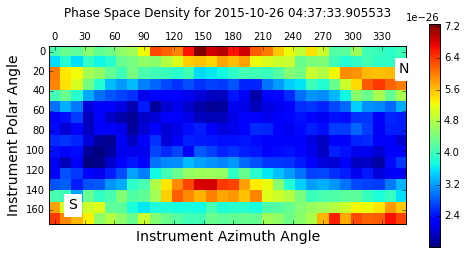

In [11]:
erg        = 0
time_label = 500
Bx         = dude['bfield'][time_label,0]
By         = dude['bfield'][time_label,1]
Bz         = dude['bfield'][time_label,2]
BTheta     = np.arccos(Bz)*180/np.pi
BThetap    = 180.0 - BTheta
BPhi       = np.arctan2(By,Bx)*180/np.pi
if BPhi < 0:
    BPhi   = BPhi + 360
BPhip      = 360.0 - BPhi

BTheta     = BTheta/11.25
BPhi       = BPhi/11.25
BThetap    = BThetap/11.25
BPhip      = BPhip/11.25

plt.matshow(np.transpose(dude['edist']['Dist'][0,:,:,erg]))#,cmap='hot')
plt.xlabel('Instrument Azimuth Angle',fontsize=14)
plt.ylabel('Instrument Polar Angle',fontsize=14)
plt.colorbar()
plt.title('Phase Space Density for %s\n' % dude['edist']['Epoch'][time_label])
x = np.arange(0,360,30)
y = np.arange(0,180,20)
plt.xticks(x/11.25,x)
plt.yticks(y/11.25,y)
plt.annotate('N',xy=(BPhi,BTheta),  fontsize=14,color='k',backgroundcolor='w')
plt.annotate('S',xy=(BPhip,BThetap),fontsize=14,color='k',backgroundcolor='w')

# Differential Counter-Streaming

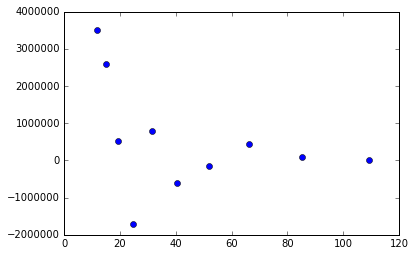

In [8]:
import scipy.interpolate as interp
time_label = 0
NW_Edata, NW_FAC = PAD.compute_limited_PAD(time_label,0,10,0,20,dude)
SW_Edata, SW_FAC = PAD.compute_limited_PAD(time_label,0,10,160,180,dude)
plt.xlabel('Energy (eV)')
plt.ylabel('Excess ')
plt.plot(NW_Edata,NW_FAC-SW_FAC,'bo')
plt.savefig('c:/users/cschiff/skippy.pdf',format='pdf',dpi=1200)

# Production runs of plots

In [6]:
fig_path = 'c:/Yuggoth/Events/2015/Oct 26/'
for i in range(start_time_label,len(dude['edist']['Epoch']),200):
    PAD.create_flux_survey_spectrum(i,date,fig_path,dude)
    PAD.create_smooth_survey_PAD_plot(i,date,fig_path,dude)
    PAD.create_raw_survey_PAD_plot(i,0,32,date,fig_path,dude)
    PAD.create_raw_survey_PAD_plot_LM(i,0,32,date,fig_path,dude)
    PAD.visualize_FPI_pixels_in_LM(i,date,fig_path,dude)

(32L, 16L, 32L)

NameError: name 'correction_override' is not defined

In [110]:
#dude['counts'][0]
#dude['edist']['Dist'][0]
#dude['jN'][0]
for erg_index in range(0,10):
    PAD_counts = np.ndarray.flatten(dude['jN'][0][:,:,erg_index])
    alpha      = np.zeros(32*16)
    counter    = 0
    for i in range(0,32):
        for j in range(0,16):
            B              = dude['bfield'][0][0:3]
            phi            = CDFs['dist']['mms1_des_phi_fast'][i]*np.pi/180
            theta          = CDFs['dist']['mms1_des_theta_fast'][j]*np.pi/180
            v              = [-np.cos(phi)*np.sin(theta),\
                              -np.sin(phi)*np.sin(theta),\
                              -np.cos(theta)]
            alpha[counter] = np.arccos(B.dot(v))*180/np.pi
            counter        = counter + 1
    count20 = 0
    for i in range(512):
        if alpha[i] <= 20:
            count20 = count20 + PAD_counts[i]
    count160 = 0
    for i in range(512):
        if alpha[i] >= 160:
            count160 = count160 + PAD_counts[i]
    print count20, count160

109053700.59 107712223.022
99762802.8722 98334401.6326
85584514.3633 85680245.8177
61454150.6589 63499455.5623
35656993.1988 35043716.8547
19838951.281 20538227.4027
10354627.7134 10560048.6954
4493881.37266 4093395.06918
1710851.51722 1622259.6176
1485803.0417 1492517.5363


In [105]:
NW_FAC

array([  1.06964218e+08,   9.86435068e+07,   8.49848526e+07,
         6.11327492e+07,   3.54846839e+07,   1.97465255e+07,
         1.03050129e+07,   4.46721899e+06,   1.69651256e+06,
         1.47808109e+06])

In [106]:
SW_FAC

array([  1.01296773e+08,   9.48972690e+07,   8.38384707e+07,
         6.25121023e+07,   3.45142377e+07,   2.02541291e+07,
         1.04074878e+07,   4.01137687e+06,   1.57813074e+06,
         1.46874154e+06])

In [178]:
pitch_angles = PAD.calculate_pitch_angles(dude['v_dirs'],dude['bfield'],0)
flat_PA      = np.ndarray.flatten(pitch_angles)

In [182]:
local_jN = np.ndarray.flatten(dude['jN'][0,:,:,0])

In [184]:
PA_range = np.where((flat_PA > 0 ) & (flat_PA < 20))

In [186]:
np.sum(local_jN[PA_range])

112187923.04040295

In [187]:
PA_table = np.array(zip(flat_PA,local_jN))

In [58]:
dude['parms']['Erg'][0:10]

array([  11.63650036,   14.92259979,   19.13660049,   24.54059982,
         31.4708004 ,   40.35789871,   51.75479889,   66.37000275,
         85.11250305,  109.14800262], dtype=float32)

In [64]:
dude['edist']['Dist'][0]

array([[[  4.41065999e-26,   3.03952205e-26,   1.72515914e-26, ...,
           1.95523649e-34,   1.28774763e-34,   0.00000000e+00],
        [  4.06974204e-26,   3.08613849e-26,   2.42933352e-26, ...,
           1.90489525e-34,   1.25697735e-34,   0.00000000e+00],
        [  6.74989511e-26,   4.59108172e-26,   3.26122124e-26, ...,
           1.90129163e-34,   1.25285428e-34,   0.00000000e+00],
        ..., 
        [  4.94575605e-26,   1.81594116e-26,   9.65140195e-27, ...,
           2.10030443e-34,   0.00000000e+00,   1.37262395e-34],
        [  6.34565629e-26,   3.67179099e-26,   1.67572437e-26, ...,
           2.13247854e-34,   0.00000000e+00,   1.39701018e-34],
        [  6.80883473e-26,   4.35731080e-26,   2.45918713e-26, ...,
           1.96668103e-34,   0.00000000e+00,   1.28211835e-34]],

       [[  4.62900220e-26,   2.67099274e-26,   1.85152357e-26, ...,
           1.92858330e-34,   1.26972492e-34,   0.00000000e+00],
        [  4.47475124e-26,   3.22130426e-26,   2.05548479e-2